## Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

In [3]:
df = pd.read_parquet("/Users/om-college/Library/CloudStorage/OneDrive-pdpu.ac.in/PDEU/BD -Big Data Analytics_/PROJECT/dataset/fhvhv_tripdata_2021-12.parquet", engine="pyarrow")
print(df.head())

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0003               B03404               B03404   
3            HV0003               B03404               B03404   
4            HV0003               B03404               B03404   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-12-01 00:03:20 2021-12-01 00:07:14 2021-12-01 00:09:16   
1 2021-12-01 00:02:58 2021-12-01 00:05:38 2021-12-01 00:06:05   
2 2021-12-01 00:20:22 2021-12-01 00:21:26 2021-12-01 00:22:45   
3 2021-12-01 00:47:40 2021-12-01 00:48:50 2021-12-01 00:50:51   
4 2021-12-01 00:25:31 2021-12-01 00:29:07 2021-12-01 00:29:12   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-12-01 00:58:03           164           265       17.54  ...       6.42   
1 2021-12-01 00:19:05            80           112       

In [4]:
df['driver_pay_per_mile'] = df['driver_pay'] / df['trip_miles']
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()/60
df['driver_pay_per_minute'] = df['driver_pay'] / df['trip_duration']
print(df.head())

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0003               B03404               B03404   
3            HV0003               B03404               B03404   
4            HV0003               B03404               B03404   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-12-01 00:03:20 2021-12-01 00:07:14 2021-12-01 00:09:16   
1 2021-12-01 00:02:58 2021-12-01 00:05:38 2021-12-01 00:06:05   
2 2021-12-01 00:20:22 2021-12-01 00:21:26 2021-12-01 00:22:45   
3 2021-12-01 00:47:40 2021-12-01 00:48:50 2021-12-01 00:50:51   
4 2021-12-01 00:25:31 2021-12-01 00:29:07 2021-12-01 00:29:12   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  tips  \
0 2021-12-01 00:58:03           164           265       17.54  ...  0.00   
1 2021-12-01 00:19:05            80           112        2.39  ...

In [5]:
df.isna().sum()

hvfhs_license_num              0
dispatching_base_num           0
originating_base_num     4248980
request_datetime               0
on_scene_datetime        4248138
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee                    0
tips                           0
driver_pay                     0
shared_request_flag            0
shared_match_flag              0
access_a_ride_flag             0
wav_request_flag               0
wav_match_flag                 0
driver_pay_per_mile          207
trip_duration                  0
driver_pay_per_minute          0
dtype: int64

In [6]:
df = df.drop(columns=['originating_base_num','on_scene_datetime'])
mean_dppm = df['driver_pay_per_mile'].mean()
# Fill null values with the mean
df['driver_pay_per_mile'].fillna(mean_dppm, inplace=True)

In [7]:
df.isna().sum()

hvfhs_license_num        0
dispatching_base_num     0
request_datetime         0
pickup_datetime          0
dropoff_datetime         0
PULocationID             0
DOLocationID             0
trip_miles               0
trip_time                0
base_passenger_fare      0
tolls                    0
bcf                      0
sales_tax                0
congestion_surcharge     0
airport_fee              0
tips                     0
driver_pay               0
shared_request_flag      0
shared_match_flag        0
access_a_ride_flag       0
wav_request_flag         0
wav_match_flag           0
driver_pay_per_mile      0
trip_duration            0
driver_pay_per_minute    0
dtype: int64

In [8]:
data = df.iloc[:2000000].copy()
data.shape

(2000000, 25)

## MODEL 1 : Neural Network

In [9]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Neural Network
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(5,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# training data
training_data = data[:1400000]
target_data = data[1400000:]
model1.compile(optimizer='adam', loss='mean_squared_error')

m1 = model1.fit(training_data[['trip_miles', 'trip_duration','bcf','tips','congestion_surcharge']], training_data['driver_pay'], epochs=10)
predictions = model1.predict(target_data[['trip_miles', 'trip_duration','bcf','tips','congestion_surcharge']] )
print(predictions[:5])
print(target_data['driver_pay'][:5])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 21s 467us/step - loss: 14.1452
Epoch 2/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 20s 452us/step - loss: 10.6067
Epoch 3/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 23s 517us/step - loss: 10.5168
Epoch 4/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 20s 459us/step - loss: 10.4122
Epoch 5/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 27s 621us/step - loss: 10.3789
Epoch 6/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 21s 480us/step - loss: 10.3083
Epoch 7/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 20s 461us/step - loss: 10.1823
Epoch 8/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 20s 464us/step - loss: 10.1673
Epoch 9/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 21s 474us/step - loss: 10.2314
Epoch 10/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 20s 464us/step - loss: 10.1584
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 7s 370us/step
[[12.595307]
 [14.24515 ]
 [12.529435]
 [18.72566 ]
 [20.137787]]
1400000    10.97
1400001    10.91
1400002    13.28
1400003    19.79
1400004    19.72
Name: driver_pay, dtype: float64


In [ ]:
print(model1.evaluate(target_data[['trip_miles', 'trip_duration','bcf','tips','congestion_surcharge']], target_data['driver_pay']))

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 6s 330us/step - loss: 9.8543
9.899750709533691


In [12]:
model1.save('m1.keras')
m1 = tf.keras.models.load_model('m1.keras')
y_pred_m1 = m1.predict(target_data[['trip_miles', 'trip_duration','bcf','tips','congestion_surcharge']])
print(y_pred_m1)

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 7s 346us/step
[[12.595307]
 [14.24515 ]
 [12.529435]
 ...
 [11.236557]
 [20.871943]
 [74.65529 ]]


In [15]:
from sklearn.metrics import f1_score
predictions = y_pred_m1
# Discretize predictions into binary classes
threshold = np.median(predictions)
binary_predictions = (predictions > threshold).astype(int)

# Discretize actual values into binary classes
threshold_actual = np.median(target_data['driver_pay'])
binary_actual = (target_data['driver_pay'] > threshold_actual).astype(int)

# Calculate F1 score
f1 = f1_score(binary_actual, binary_predictions)

print("F1 Score:", f1)

F1 Score: 0.922523321338629


In [16]:

a = np.mean(target_data['driver_pay'][:5])
b = np.mean(predictions[:5])
print("Average Driver Pay(Actual):",a,"\nAverage Driver Pay(Predicted):",b,"\nDifference: ",b-a,)

Average Driver Pay(Actual): 14.934000000000001 
Average Driver Pay(Predicted): 15.6466675 
Difference:  0.712667480468749


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(target_data['driver_pay'][:5], predictions[:5]))
mse = mean_squared_error(target_data['driver_pay'][:5], predictions[:5])
r2 = r2_score(target_data['driver_pay'][:5], predictions[:5])


print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 1.768364177006393
Mean Squared Error (MSE): 3.1271118625194974
R-squared (R2) Score: 0.8072732449291627


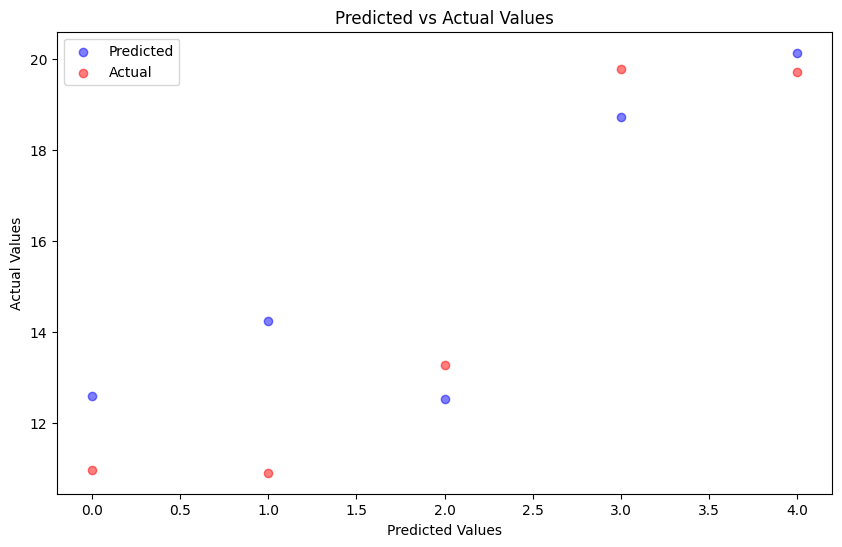

In [18]:
import matplotlib.pyplot as plt

# Assuming 'predictions' contains the predicted values and 'target_data' contains the actual values
plt.figure(figsize=(10, 6))

# Plotting predicted values in blue
plt.scatter(range(5),predictions[:5],color='blue', label='Predicted', alpha=0.5)
# Plotting target data in red
plt.scatter(range(5),target_data['driver_pay'][:5], color='red', label='Actual', alpha=0.5)

plt.title('Predicted vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()


## MODEL 2 : Random Forest

In [19]:
data2 = data[:2000000].copy()
data2.shape

(2000000, 25)

In [20]:
feature_list=['trip_miles', 'trip_duration','bcf','tips','congestion_surcharge','driver_pay']
features = data2[feature_list]
labels = features['driver_pay']
features = features.drop('driver_pay', axis = 1)
print(features.head())


   trip_miles  trip_duration   bcf  tips  congestion_surcharge
0       17.54      48.783333  2.17  0.00                  2.75
1        2.39      13.000000  0.40  0.00                  0.00
2        4.91      21.033333  0.68  5.05                  0.00
3        1.59       8.483333  0.29  0.00                  0.00
4        1.78       8.166667  0.21  7.00                  2.75


In [21]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
import time

# Parallelization and reducing tree depth
start_time = time.time()
model2 = RandomForestRegressor(n_estimators=1000, max_depth=15, n_jobs=-1, random_state=119, verbose =2)
model2.fit(train_features, train_labels)
end_time = time.time()
# Calculate training time
training_time = end_time - start_time
print("Training time:", training_time, "seconds")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000building tree 23 of 1000

building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.1s


building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min


building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000building tree 180 of 1000

building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.2min


building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.8min


building tree 641 of 1000
building tree 642 of 1000
building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 19.4min finished


In [23]:
import matplotlib.pyplot as plt
y_pred_m2 = model2.predict(test_features)
print(y_pred_m2[:5])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    9.7s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:   16.6s


[36.9379628   9.8218172  15.13886421  6.17272631 23.38100411]


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   28.0s finished


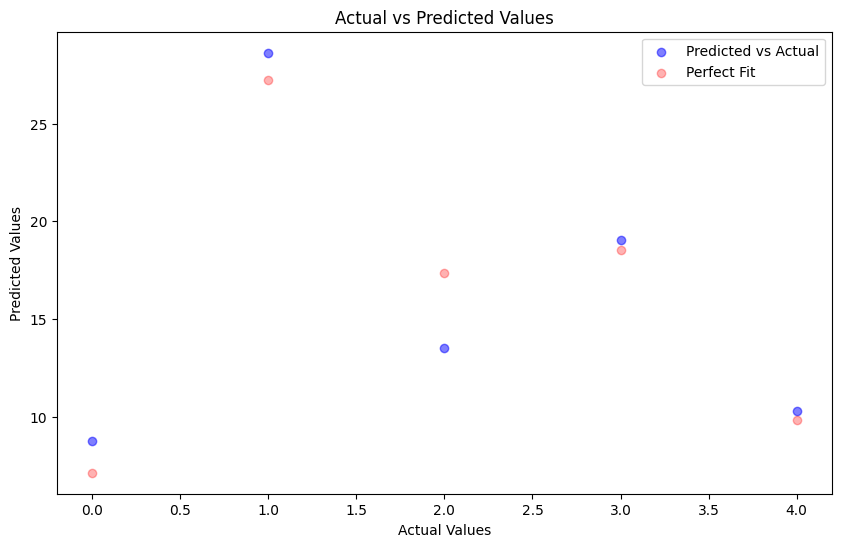

In [24]:
# Predict the last 5 values of driver pay
predicted_values = y_pred_m2[-5:]
actual_values = test_labels[-5:]

# Scatter graph: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(range(5), predicted_values, color='blue', label='Predicted vs Actual', alpha=0.5)
plt.scatter(range(5), actual_values, color='red', label='Perfect Fit', alpha=0.3)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R2  score: ",r2)

Root Mean Squared Error (RMSE): 1.9996244619724732
Mean Squared Error (MSE): 3.998497988918703
R2  score:  0.9205432924134156


## MODEL 3 - LSTM

In [43]:
weather = pd.read_csv('/Users/om-college/Library/CloudStorage/OneDrive-pdpu.ac.in/PDEU/BD -Big Data Analytics_/PROJECT/dataset/nyc 2021-01-01 to 2021-12-31.csv')
weather.isnull().sum()

name                  0
address               0
resolvedAddress       0
datetime              0
temp                  0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
preciptype          213
snow                  0
snowdepth             0
windgust             73
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
uvindex               0
severerisk          365
dtype: int64

In [44]:
weather.drop(columns=['severerisk', 'windgust'], inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              365 non-null    object 
 1   address           365 non-null    object 
 2   resolvedAddress   365 non-null    object 
 3   datetime          365 non-null    object 
 4   temp              365 non-null    float64
 5   feelslike         365 non-null    float64
 6   dew               365 non-null    float64
 7   humidity          365 non-null    float64
 8   precip            365 non-null    float64
 9   precipprob        365 non-null    int64  
 10  preciptype        152 non-null    object 
 11  snow              365 non-null    float64
 12  snowdepth         365 non-null    float64
 13  windspeed         365 non-null    float64
 14  winddir           365 non-null    float64
 15  sealevelpressure  365 non-null    float64
 16  cloudcover        365 non-null    float64
 1

In [35]:
weather_object_columns = weather.select_dtypes(include=['object']).columns
weather_object_columns

Index(['name', 'address', 'resolvedAddress', 'datetime', 'preciptype'], dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   hvfhs_license_num      object        
 1   dispatching_base_num   object        
 2   request_datetime       datetime64[us]
 3   pickup_datetime        datetime64[us]
 4   dropoff_datetime       datetime64[us]
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   trip_miles             float64       
 8   trip_time              int64         
 9   base_passenger_fare    float64       
 10  tolls                  float64       
 11  bcf                    float64       
 12  sales_tax              float64       
 13  congestion_surcharge   float64       
 14  airport_fee            float64       
 15  tips                   float64       
 16  driver_pay             float64       
 17  shared_request_flag    object        
 18  shared_match_flag     

In [45]:
# for x in weather_object_columns:
#     if x != 'datetime':
#         weather[x] = label_encoder.fit_transform(weather[x])
# data['request_date'] = data['request_datetime'].dt.date
# weather['date'] = pd.to_datetime(weather['datetime']).dt.date

# # Merge the two DataFrames on the 'request_date' column from df1 and 'date' column from df2
# merged_df = pd.merge(data, weather, left_on='request_date', right_on='date', how='inner')

# # Drop the redundant 'date' column if necessary
# # merged_df.drop(columns=['date'], inplace=True)

# # Print the merged DataFrame
# print(merged_df)

from sklearn.preprocessing import LabelEncoder

# Encode object columns in the weather DataFrame
label_encoder = LabelEncoder()
for x in weather_object_columns:
    if x != 'datetime':
        weather[x] = label_encoder.fit_transform(weather[x])

data['request_date'] = data['request_datetime'].dt.date
weather['date'] = pd.to_datetime(weather['datetime']).dt.date
merged_df = pd.merge(data2, weather, left_on='request_date', right_on='date', how='inner')
print(merged_df)


        hvfhs_license_num dispatching_base_num    request_datetime  \
0                  HV0003               B03404 2021-12-01 00:03:20   
1                  HV0003               B03404 2021-12-01 00:02:58   
2                  HV0003               B03404 2021-12-01 00:20:22   
3                  HV0003               B03404 2021-12-01 00:47:40   
4                  HV0003               B03404 2021-12-01 00:25:31   
...                   ...                  ...                 ...   
1999995            HV0003               B03404 2021-12-04 14:38:19   
1999996            HV0003               B03404 2021-12-04 13:57:11   
1999997            HV0003               B03404 2021-12-04 14:08:30   
1999998            HV0003               B03404 2021-12-04 14:23:54   
1999999            HV0003               B03404 2021-12-04 14:44:10   

            pickup_datetime    dropoff_datetime  PULocationID  DOLocationID  \
0       2021-12-01 00:09:16 2021-12-01 00:58:03           164           265   
1

In [46]:
features = merged_df.columns
features

Index(['hvfhs_license_num', 'dispatching_base_num', 'request_datetime',
       'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf',
       'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay', 'shared_request_flag', 'shared_match_flag',
       'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag',
       'driver_pay_per_mile', 'trip_duration', 'driver_pay_per_minute',
       'request_date', 'name', 'address', 'resolvedAddress', 'datetime',
       'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'uvindex', 'date'],
      dtype='object')

In [47]:
object_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for x in object_columns:
    merged_df[x] = label_encoder.fit_transform(merged_df[x])

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   hvfhs_license_num      int64         
 1   dispatching_base_num   int64         
 2   request_datetime       datetime64[us]
 3   pickup_datetime        datetime64[us]
 4   dropoff_datetime       datetime64[us]
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   trip_miles             float64       
 8   trip_time              int64         
 9   base_passenger_fare    float64       
 10  tolls                  float64       
 11  bcf                    float64       
 12  sales_tax              float64       
 13  congestion_surcharge   float64       
 14  airport_fee            float64       
 15  tips                   float64       
 16  driver_pay             float64       
 17  shared_request_flag    int64         
 18  shared_match_flag     

In [50]:
merged_df = merged_df.drop(columns=['datetime', 'date','request_datetime','request_date', 'pickup_datetime', 'dropoff_datetime', 'date'], axis=1)

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   hvfhs_license_num      int64  
 1   dispatching_base_num   int64  
 2   PULocationID           int64  
 3   DOLocationID           int64  
 4   trip_miles             float64
 5   trip_time              int64  
 6   base_passenger_fare    float64
 7   tolls                  float64
 8   bcf                    float64
 9   sales_tax              float64
 10  congestion_surcharge   float64
 11  airport_fee            float64
 12  tips                   float64
 13  driver_pay             float64
 14  shared_request_flag    int64  
 15  shared_match_flag      int64  
 16  access_a_ride_flag     int64  
 17  wav_request_flag       int64  
 18  wav_match_flag         int64  
 19  driver_pay_per_mile    float64
 20  trip_duration          float64
 21  driver_pay_per_minute  float64
 22  name              

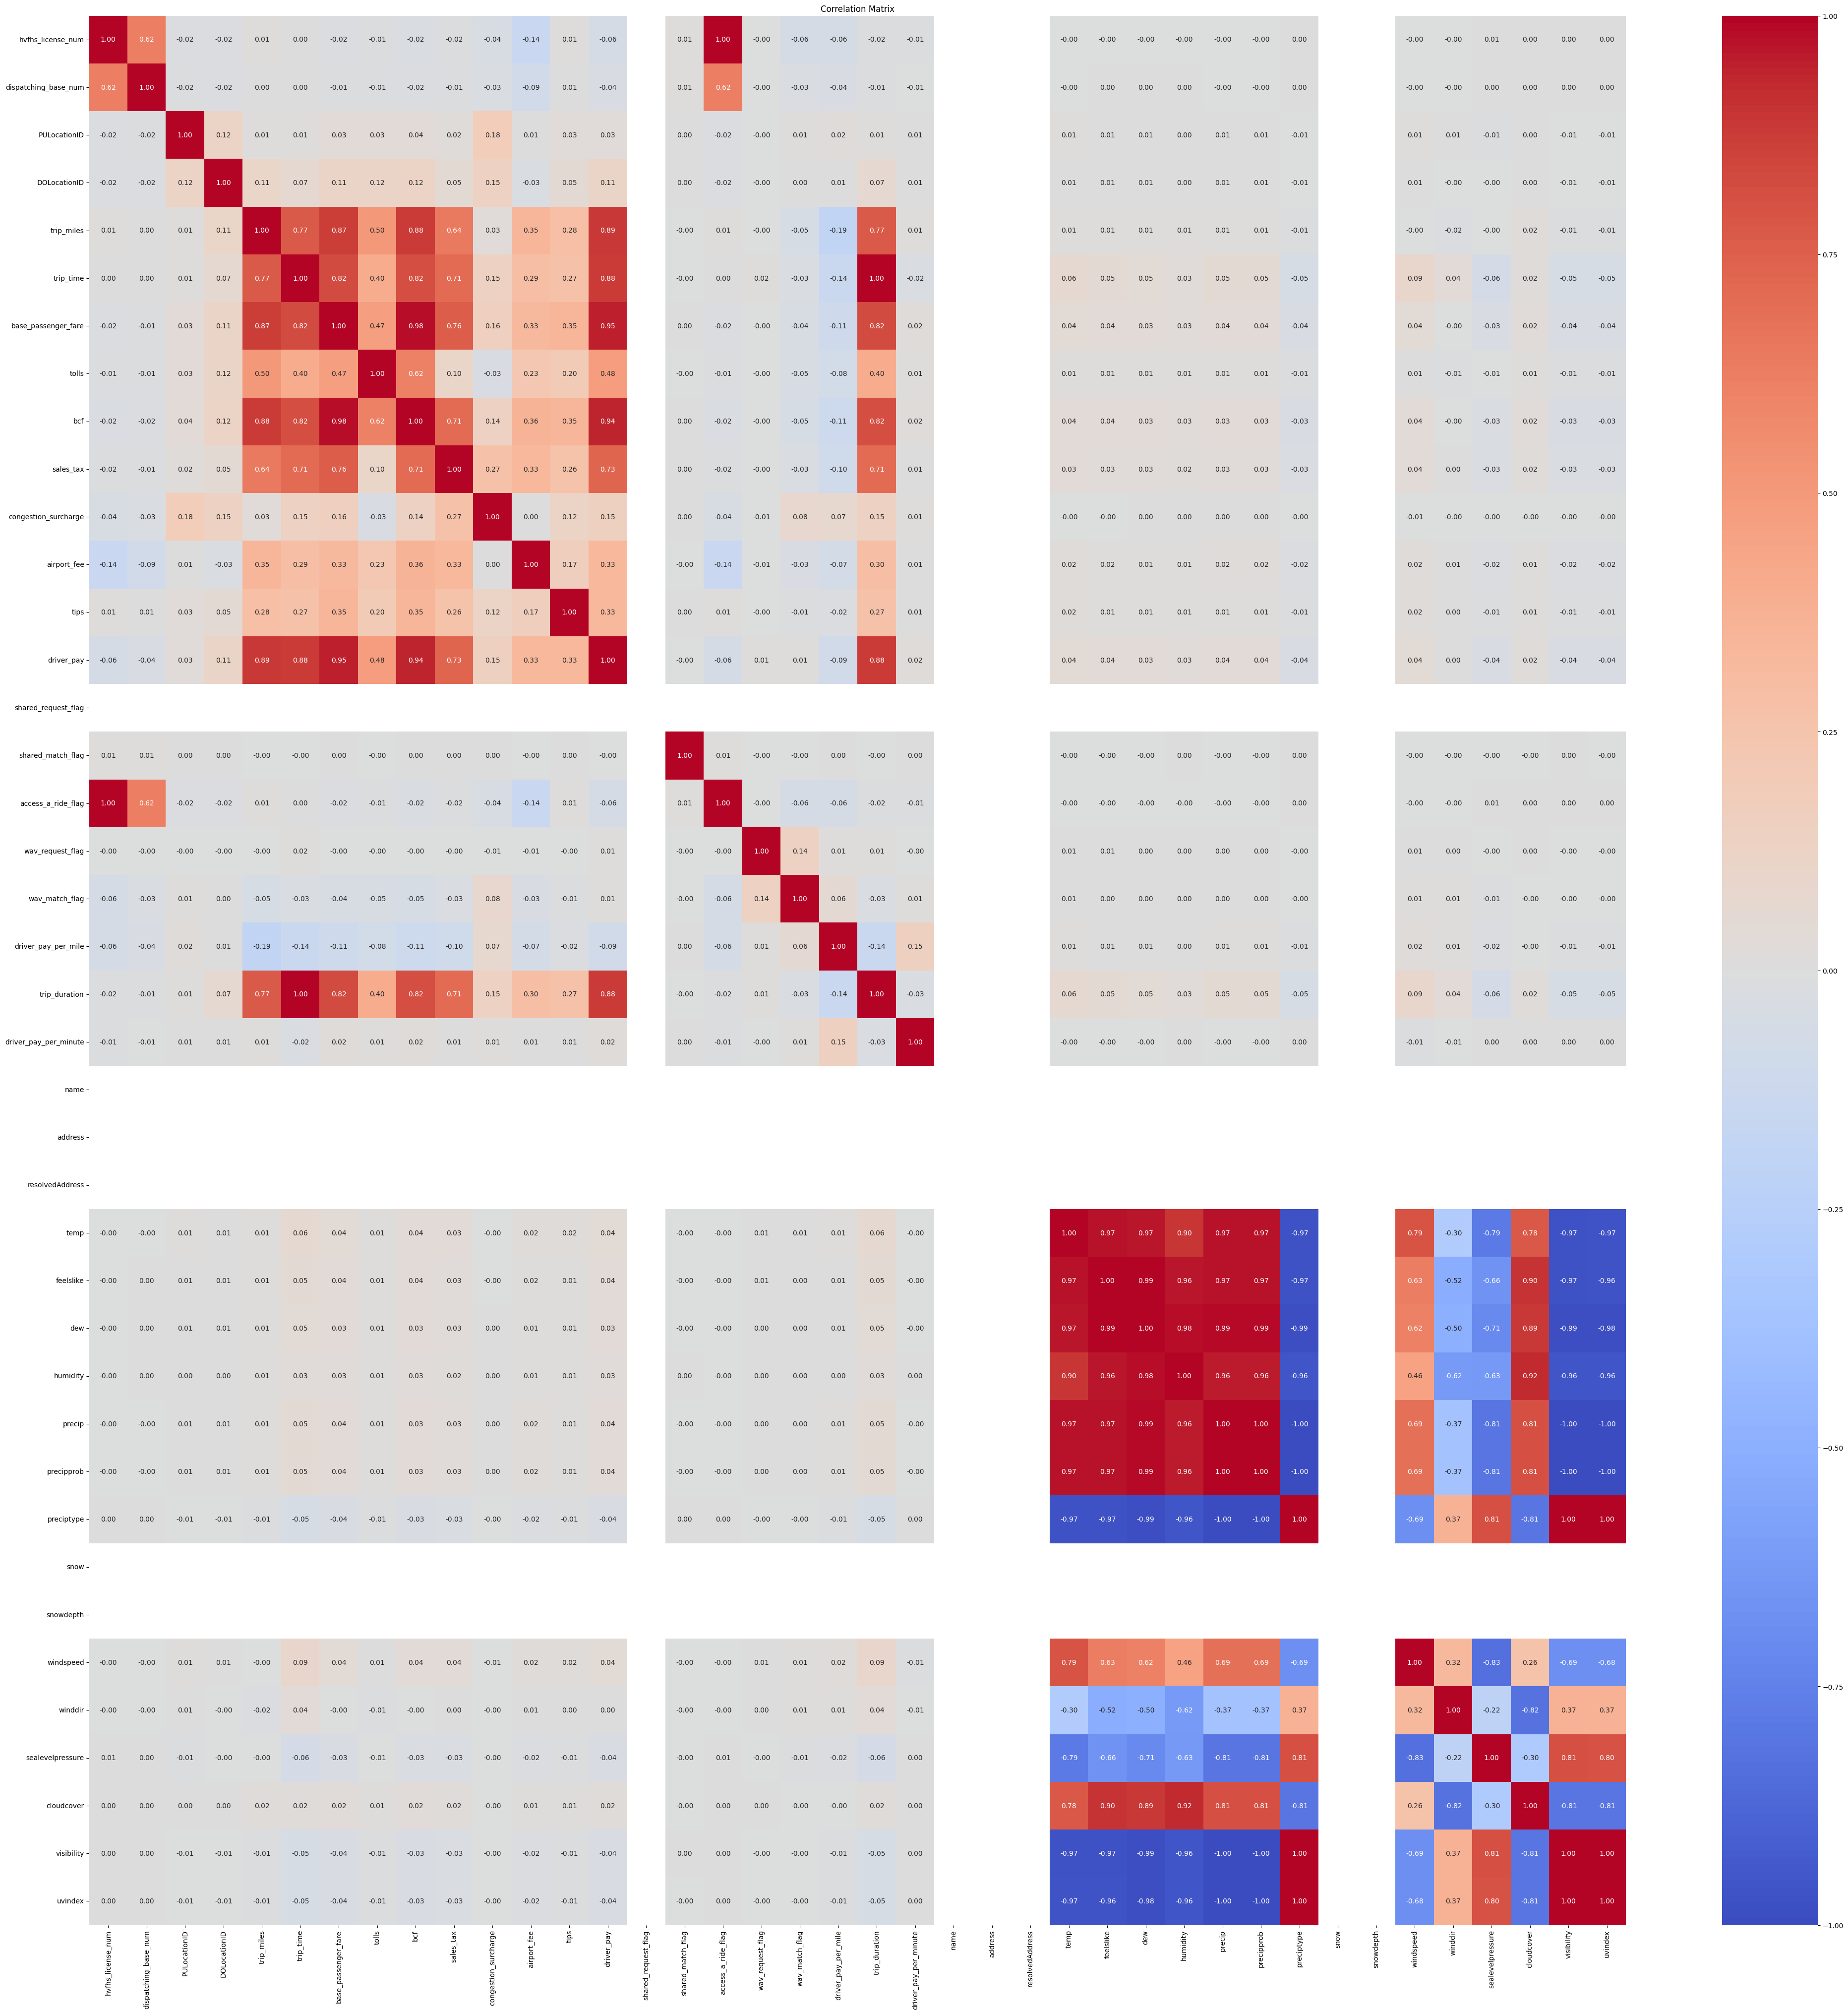

In [52]:
import seaborn as sns

correlation_matrix = merged_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png')
plt.show()


In [54]:
correlation_with_driver_pay = merged_df.corr()['driver_pay'].sort_values(ascending=False)
print(correlation_with_driver_pay)


driver_pay               1.000000
base_passenger_fare      0.948162
bcf                      0.943677
trip_miles               0.888677
trip_duration            0.876624
trip_time                0.876201
sales_tax                0.731104
tolls                    0.480044
tips                     0.329006
airport_fee              0.328361
congestion_surcharge     0.149102
DOLocationID             0.111447
windspeed                0.043215
temp                     0.040197
precipprob               0.035741
precip                   0.035741
feelslike                0.035005
dew                      0.034042
PULocationID             0.030572
humidity                 0.027839
cloudcover               0.021779
driver_pay_per_minute    0.020148
wav_match_flag           0.010055
wav_request_flag         0.008854
winddir                  0.003683
shared_match_flag       -0.002118
sealevelpressure        -0.035340
uvindex                 -0.035539
preciptype              -0.035741
visibility    

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Check if TensorFlow is using GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11157188649583752160
xla_global_id: -1
]


In [57]:
# Preprocessing
# driver_pay               1.000000
# base_passenger_fare      0.948162
# bcf                      0.943677
# trip_miles               0.888677
# trip_duration            0.876624
# trip_time                0.876201
# sales_tax                0.731104
# tolls                    0.480044
# tips                     0.329006
# airport_fee              0.328361
# congestion_surcharge     0.149102
# DOLocationID             0.111447
# windspeed                0.043215
# temp                     0.040197
# precipprob               0.035741
# precip                   0.035741
# feelslike                0.035005


# Assuming you want to use these columns for prediction
features = ['base_passenger_fare','bcf','trip_miles','trip_duration',
            'trip_time','sales_tax','tolls','tips','airport_fee',
            'congestion_surcharge','DOLocationID','windspeed','temp',
            'precipprob' ]

target_variable = 'driver_pay'
# Select features and target variable
X = merged_df[features].values
y = merged_df[target_variable].values

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the input data for LSTM
# LSTM expects input data to be 3D in the form of (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [58]:
# Building the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dropout(0.2))
model3.add(LSTM(units=50, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=50))
model3.add(Dropout(0.2))
model3.add(Dense(units=1))

# Compiling the model
model3.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history1 = model3.fit(X_train, y_train, epochs=9, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss1 = model3.evaluate(X_test, y_test)
print(f'Test Loss - LSTM: {loss1}')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 45.1675 - val_loss: 12.1243
Epoch 2/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 55s 1ms/step - loss: 15.0562 - val_loss: 10.9290
Epoch 3/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 14.0983 - val_loss: 10.9349
Epoch 4/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 13.8298 - val_loss: 10.7911
Epoch 5/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - loss: 13.0625 - val_loss: 11.0889
Epoch 6/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - loss: 13.2173 - val_loss: 11.0014
Epoch 7/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 12.5105 - val_loss: 12.0913
Epoch 8/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 12.6320 - val_loss: 11.7792
Epoch 9/9
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - loss: 12.2701 - val_loss: 12.4132
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 7s 385us/step - loss: 12.6201
Test Loss - LSTM: 12.413166999816895


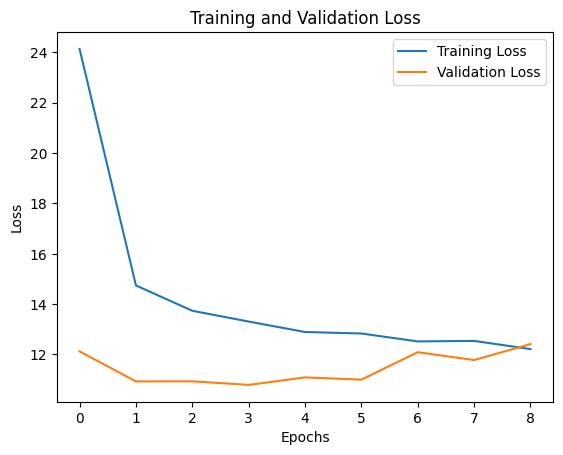

In [59]:
# Plotting the training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_m3 = model3.predict(X_test)
print(y_pred_m3[:5])

In [90]:
from sklearn.metrics import f1_score
threshold = np.median(y_pred_m3)
threshold_actual = np.median(y_test)
y_pred_classes = (y_pred_m3 > threshold).astype(int)
y_test_classes = (y_test > threshold_actual).astype(int)
f1_lstm = f1_score(y_test_classes, y_pred_classes)

# threshold = np.median(y_pred_m3)
# binary_predictions = (predictions > threshold).astype(int)

# # Discretize actual values into binary classes
# threshold_actual = np.median(target_data['driver_pay'])
# binary_actual = (target_data['driver_pay'] > threshold_actual).astype(int)
# f1_lstm = f1_score(binary_actual, binary_predictions)

print("F1 score: LSTM", f1_lstm)

F1 score: LSTM 0.9338387273139444


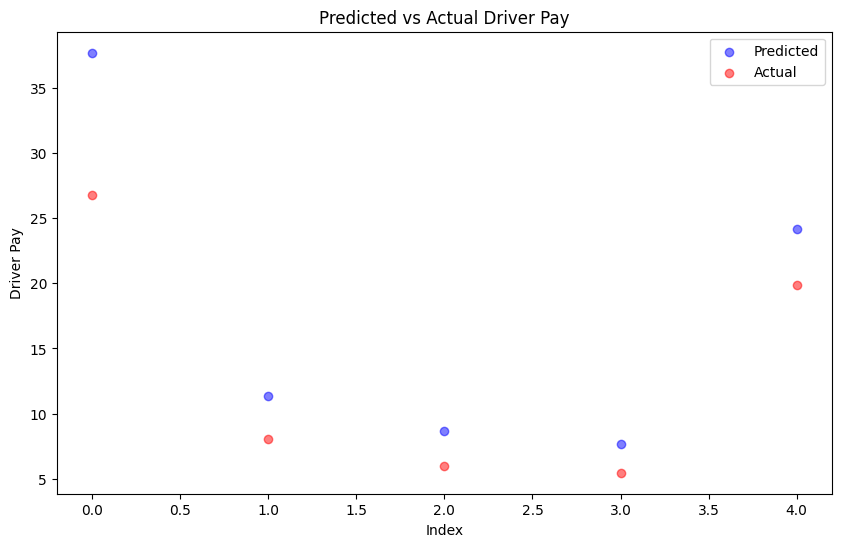

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(range(5),y_pred_m3[:5],color='blue', label='Predicted', alpha=0.5)
plt.scatter(range(5),y_test[:5], color='red', label='Actual', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Driver Pay')
plt.title('Predicted vs Actual Driver Pay')
plt.legend()
plt.show()

## MODEL 4 - LSTM-Bidirectional

In [64]:
from tensorflow.keras.layers import Bidirectional

In [65]:
model4 = Sequential([
    Bidirectional(LSTM(30, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(30, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compiling the model
model4.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history2 = model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss2 = model4.evaluate(X_test, y_test)
print("Test Loss:", loss2)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43750/43750 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - loss: 21.7067 - val_loss: 9.7052
Epoch 2/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 11.9589 - val_loss: 9.3157
Epoch 3/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 11.2309 - val_loss: 9.1538
Epoch 4/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 11.1218 - val_loss: 9.1710
Epoch 5/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 10.9601 - val_loss: 9.1891
Epoch 6/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 10.7820 - val_loss: 9.1364
Epoch 7/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 10.9291 - val_loss: 9.2054
Epoch 8/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - loss: 10.8493 - val_loss: 9.0898
Epoch 9/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 10.6669 - val_loss: 9.2153
Epoch 10/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step - loss: 10.7849 - val_loss: 9.1373
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 8s 425us/step - loss: 9.0657
Test Loss: 9.137279510498047

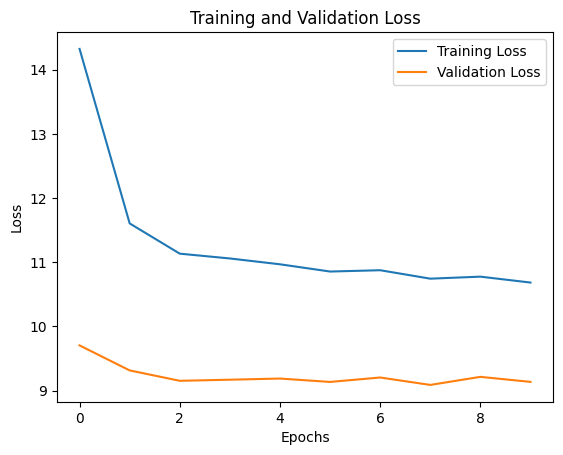

In [69]:
# Plotting the training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [77]:
y_pred_m4 = model4.predict(X_test)
print(y_pred_m4)

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 8s 410us/step
[[34.86378  ]
 [10.086328 ]
 [ 7.6066394]
 ...
 [13.423705 ]
 [19.181433 ]
 [21.866278 ]]


In [91]:
from sklearn.metrics import f1_score
# threshold = 0.6
# y_pred_classes = (y_pred_m4 > threshold).astype(int)
# y_test_classes = (y_test > threshold).astype(int)
# f1_2 = f1_score(y_test_classes, y_pred_classes)
threshold2 = np.median(y_pred_m4)
threshold_actual2 = np.median(y_test)
y_pred_classes2 = (y_pred_m4 > threshold2).astype(int)
y_test_classes2 = (y_test > threshold_actual2).astype(int)
f1_lstm2 = f1_score(y_test_classes2, y_pred_classes2)

# threshold = np.median(y_pred_m3)
# binary_predictions = (predictions > threshold).astype(int)

# # Discretize actual values into binary classes
# threshold_actual = np.median(target_data['driver_pay'])
# binary_actual = (target_data['driver_pay'] > threshold_actual).astype(int)
# f1_lstm = f1_score(binary_actual, binary_predictions)

print("F1 score: LSTM-Bidirectional", f1_lstm2)

# print("F1 score: - LSTM-BIDIRECTIONAL", f1_2)

F1 score: LSTM-Bidirectional 0.9344721366563988


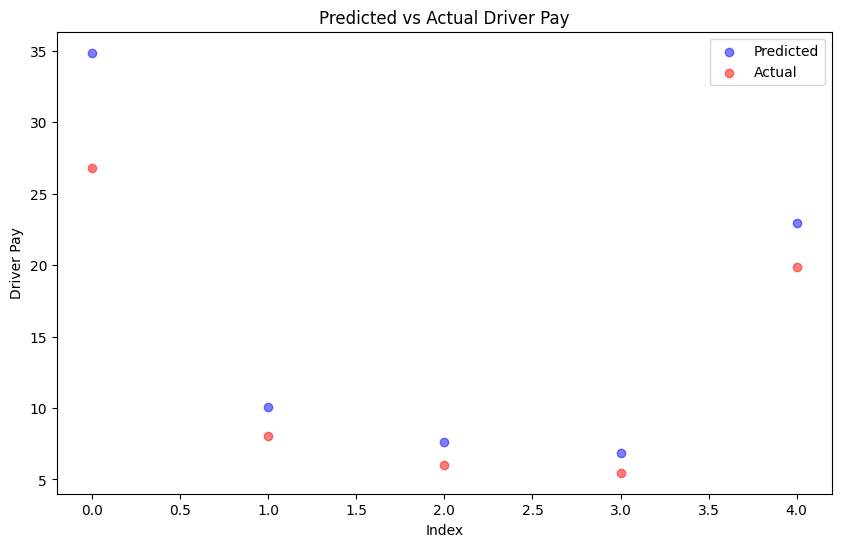

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(range(5),y_pred_m4[:5],color='blue', label='Predicted', alpha=0.5)
plt.scatter(range(5),y_test[:5], color='red', label='Actual', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Driver Pay')
plt.title('Predicted vs Actual Driver Pay')
plt.legend()
plt.show()

## MODEL 5 - LSTM-GRU

In [80]:
from keras.layers import GRU

In [82]:
model_lstm_gru = Sequential()
model_lstm_gru.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_gru.add(Dropout(0.2))
model_lstm_gru.add(GRU(units=50, return_sequences=True))
model_lstm_gru.add(Dropout(0.2))
model_lstm_gru.add(LSTM(units=50))
model_lstm_gru.add(Dropout(0.2))
model_lstm_gru.add(Dense(units=1))
model_lstm_gru.compile(optimizer='adam', loss='mean_squared_error')


In [83]:
# Training the model
history_lstm_gru = model_lstm_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 45.3420 - val_loss: 12.2086
Epoch 2/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - loss: 14.9995 - val_loss: 11.4264
Epoch 3/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 13.9954 - val_loss: 11.8392
Epoch 4/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step - loss: 12.8260 - val_loss: 10.4929
Epoch 5/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 59s 1ms/step - loss: 12.8676 - val_loss: 10.5101
Epoch 6/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 101s 2ms/step - loss: 12.4146 - val_loss: 10.4727
Epoch 7/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 63s 1ms/step - loss: 12.0512 - val_loss: 11.0237
Epoch 8/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 12.1295 - val_loss: 10.7716
Epoch 9/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 12.6820 - val_loss: 11.1425
Epoch 10/10
43750/43750 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - loss: 12.7666 - val_loss: 10.8808


18750/18750 ━━━━━━━━━━━━━━━━━━━━ 6s 345us/step - loss: 11.1062
Test Loss for LSTM-GRU: 10.88078498840332


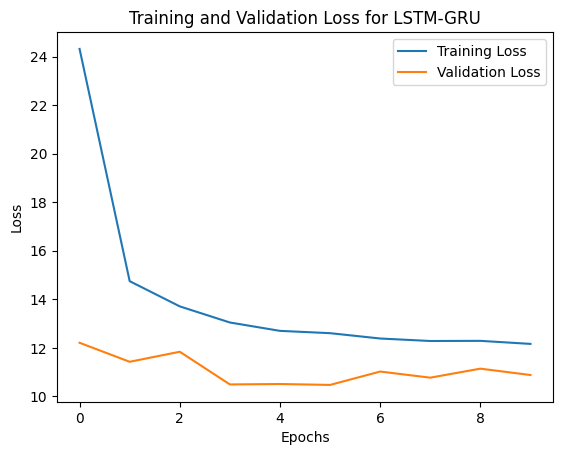

In [84]:
# Evaluation for LSTM-GRU model
loss_lstm_gru = model_lstm_gru.evaluate(X_test, y_test)
print("Test Loss for LSTM-GRU:", loss_lstm_gru)

# Plotting the training and validation loss for LSTM-GRU
plt.plot(history_lstm_gru.history['loss'], label='Training Loss')
plt.plot(history_lstm_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for LSTM-GRU')
plt.legend()
plt.show()

In [85]:
y_pred_lstm_gru = model_lstm_gru.predict(X_test)
print(y_pred_lstm_gru[:5])

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 8s 412us/step
[[33.88064 ]
 [11.068125]
 [ 8.987665]
 [ 7.965273]
 [22.924477]]


In [104]:
# Calculate F1 score for LSTM-GRU
# threshold = 0.9
# y_pred_classes_lstm_gru = (y_pred_lstm_gru > threshold).astype(int)
# y_test_classes_lstm_gru = (y_test > threshold).astype(int)
# f1_lstm_gru = f1_score(y_test_classes_lstm_gru, y_pred_classes_lstm_gru)

# print("F1 score for LSTM-GRU:", f1_lstm_gru)

from sklearn.metrics import f1_score
threshold3 = np.median(y_pred_lstm_gru)
threshold_actual3 = np.median(y_test)
y_pred_classes3 = (y_pred_lstm_gru > threshold3).astype(int)
y_test_classes3 = (y_test > threshold_actual3).astype(int)
f1_lstm_gru = f1_score(y_test_classes3, y_pred_classes3)
print("F1 score: LSTM-GRU", f1_lstm_gru)

F1 score: LSTM-GRU 0.9340354175834433


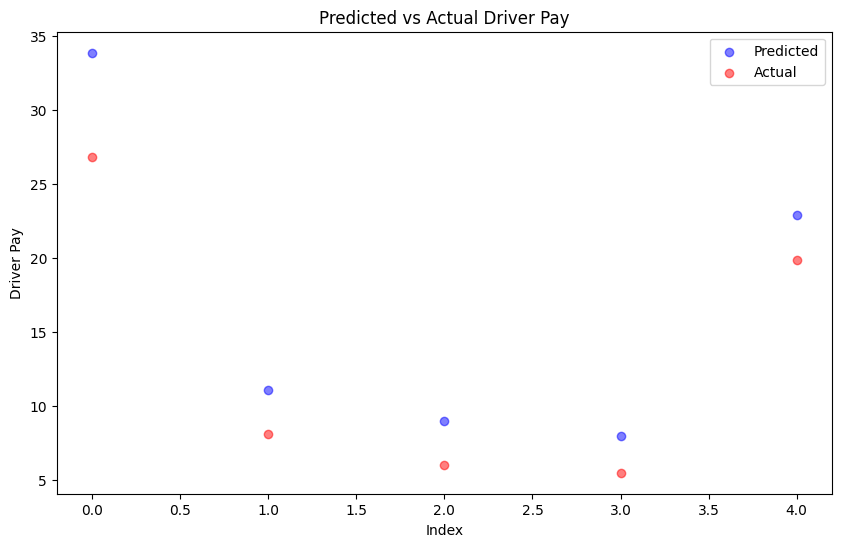

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(range(5),y_pred_lstm_gru[:5],color='blue', label='Predicted', alpha=0.5)
plt.scatter(range(5),y_test[:5], color='red', label='Actual', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Driver Pay')
plt.title('Predicted vs Actual Driver Pay')
plt.legend()
plt.show()